## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [454]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [455]:
# Create path
path = r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency"

In [456]:
# Import the DEAutos data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'DEautos_wrangled.csv'))


### 2. Data cleaning

In [458]:
df.columns

Index(['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type',
       'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission',
       'Price', 'City'],
      dtype='object')

In [459]:
df.head(20)

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg
5,Volkswagen,Tiguan,2011,107269,Electric,10.1,449,Automatic,15308.15,Berlin
6,BMW,X3,2012,121481,Petrol,10.8,456,Automatic,44140.68,Hamburg
7,BMW,5 Series,2012,251434,Petrol,11.6,368,Automatic,5986.91,Hamburg
8,Porsche,Panamera,2018,157502,Electric,8.6,101,Manual,21694.91,Frankfurt
9,BMW,3 Series,2022,25732,Electric,10.5,270,Manual,58172.74,Frankfurt


In [460]:
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [461]:
# Define the path where you want to save the file
path = r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency"

# Construct the file path using os.path.join
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'DEautos_wrangled.csv')

# Save the cleaned DataFrame to the specified location
df.to_csv(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency\02 Data\Prepared Data\DEautos_wrangled.csv


In [462]:
df.shape

(500, 10)

In [463]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Brand                         0
Model                         0
Year                          0
Mileage                       0
Fuel Type                     0
Fuel Consumption (L/100km)    0
Horsepower (HP)               0
Transmission                  0
Price                         0
City                          0
dtype: int64

In [464]:
# Check for Duplicates
dups = df.duplicated()

In [465]:
dups.shape # No dups

(500,)

##### Extreme values checks

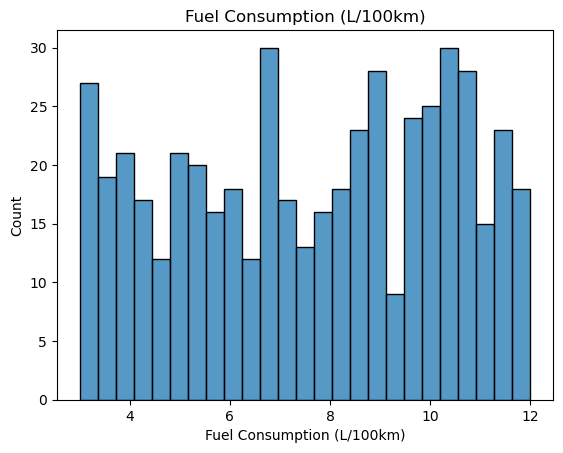

In [467]:
# Replace distplot with histplot
plt.title('Fuel Consumption (L/100km)')
sns.histplot(df['Fuel Consumption (L/100km)'], bins=25)  # Shows extreme values

# Explicitly show the plot
plt.show()

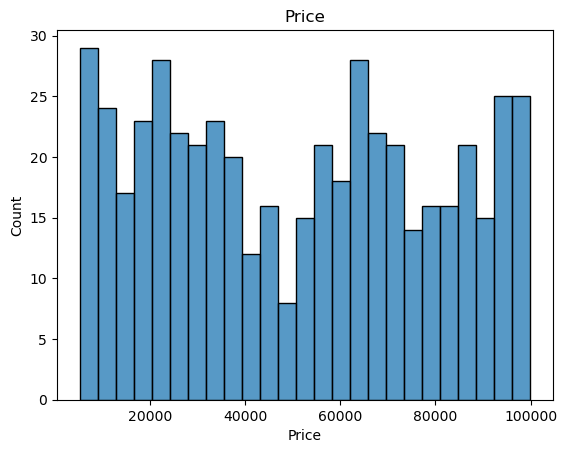

In [468]:
# Replace distplot with histplot
plt.title('Price')
sns.histplot(df['Price'], bins=25)  # Shows extreme values

# Explicitly show the plot
plt.show()

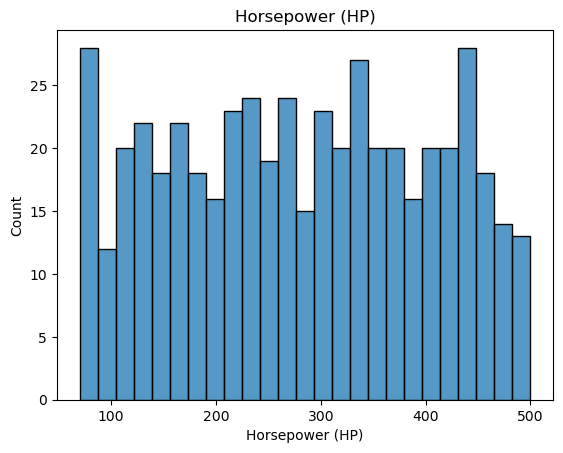

In [469]:
# Replace distplot with histplot
# Add title and labels
plt.title('Horsepower (HP)')
sns.histplot(df['Horsepower (HP)'], bins=25)  # Shows extreme values

# Explicitly show the plot
plt.show()

In [470]:
df['Price'].mean() # Check the mean


51064.28894

In [471]:
df['Price'].median() # Check the median

52892.525

In [472]:
df['Price'].max() # Check the max

99981.48

### 3. Data prep for regression analysis 

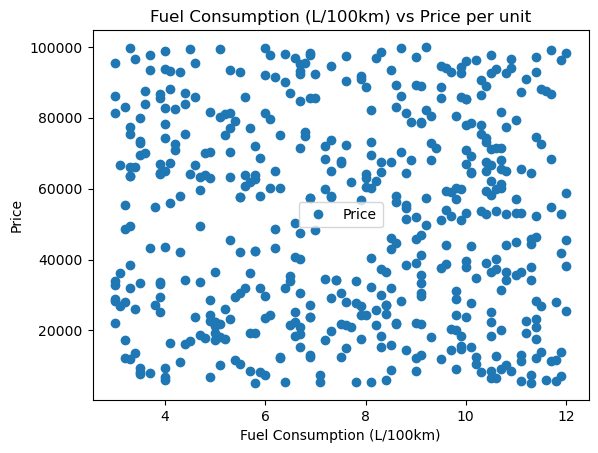

In [474]:
import matplotlib.pyplot as plt

# Create a scatterplot using matplotlib
df.plot(x='Fuel Consumption (L/100km)', y='Price', style='o', label=None)  # Remove the default label

# Add title and labels
plt.title('Fuel Consumption (L/100km) vs Price per unit')  
plt.xlabel('Fuel Consumption (L/100km)')  
plt.ylabel('Price')  


# Show the plot
plt.show()


In [475]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Fuel Consumption (L/100km)'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [476]:
X

array([[ 9.5],
       [ 6.5],
       [ 9.9],
       [ 4.1],
       [ 5.2],
       [10.1],
       [10.8],
       [11.6],
       [ 8.6],
       [10.5],
       [ 6.6],
       [ 7.5],
       [11.4],
       [ 9.9],
       [10. ],
       [ 7.1],
       [11.1],
       [ 7.6],
       [12. ],
       [ 9.5],
       [10.9],
       [ 5.4],
       [ 3.5],
       [ 7.6],
       [ 9.9],
       [ 6.6],
       [ 7.5],
       [ 5.1],
       [ 7.9],
       [ 7.3],
       [ 6.6],
       [ 7.8],
       [ 6. ],
       [11.3],
       [ 5.3],
       [ 5.3],
       [ 6.9],
       [ 7.9],
       [ 4. ],
       [ 8.2],
       [10.3],
       [10.2],
       [10.5],
       [11.3],
       [ 9.1],
       [10.8],
       [ 6.7],
       [ 4.8],
       [ 8.6],
       [10.5],
       [ 9.7],
       [ 8.5],
       [ 6.1],
       [ 5.8],
       [10.2],
       [ 7.7],
       [ 5.1],
       [ 3.3],
       [ 6.3],
       [ 3.5],
       [ 9.7],
       [10.7],
       [ 8.1],
       [ 8. ],
       [ 5. ],
       [ 9.9],
       [ 8

In [477]:
y

array([[12063.27],
       [33890.58],
       [92639.12],
       [88003.5 ],
       [26028.97],
       [15308.15],
       [44140.68],
       [ 5986.91],
       [21694.91],
       [58172.74],
       [96926.17],
       [21897.61],
       [12182.03],
       [15725.01],
       [53162.29],
       [ 5581.21],
       [65411.9 ],
       [21605.04],
       [38185.54],
       [94527.1 ],
       [96681.76],
       [29456.24],
       [79954.02],
       [97407.64],
       [18350.07],
       [40829.05],
       [12431.02],
       [80090.82],
       [17642.96],
       [57566.52],
       [50440.5 ],
       [33959.39],
       [81233.65],
       [64447.73],
       [81259.02],
       [23362.07],
       [85681.2 ],
       [56667.92],
       [98885.42],
       [25669.89],
       [90673.66],
       [12412.04],
       [97808.57],
       [44431.78],
       [78689.39],
       [64913.78],
       [19073.1 ],
       [69961.24],
       [89225.65],
       [92643.5 ],
       [58991.32],
       [15951.  ],
       [2441

In [478]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [480]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [481]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [482]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

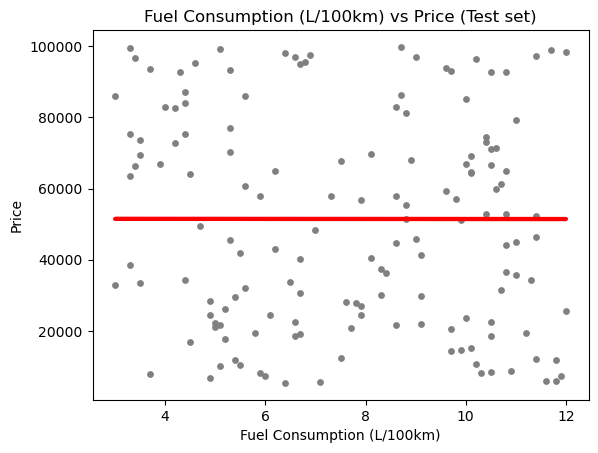

In [483]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Fuel Consumption (L/100km) vs Price (Test set)')
plot_test.xlabel('Fuel Consumption (L/100km)')
plot_test.ylabel('Price')
plot_test.show()

In [484]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [485]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.62632609]]
Mean squared error:  876294189.2631456
R2 score:  -0.0019181204613076819


In [486]:
y_predicted

array([[51450.6882024 ],
       [51452.13873283],
       [51448.87503935],
       [51454.31452849],
       [51463.74297632],
       [51461.20454806],
       [51447.78714153],
       [51448.87503935],
       [51463.74297632],
       [51443.43555022],
       [51447.06187631],
       [51460.47928284],
       [51474.25932198],
       [51452.13873283],
       [51468.45720024],
       [51462.65507849],
       [51463.0177111 ],
       [51472.80879154],
       [51462.29244588],
       [51458.30348719],
       [51445.61134587],
       [51453.95189588],
       [51471.35826111],
       [51461.56718067],
       [51447.78714153],
       [51447.06187631],
       [51467.36930241],
       [51467.73193502],
       [51467.0066698 ],
       [51455.76505892],
       [51470.63299589],
       [51445.61134587],
       [51456.85295675],
       [51450.32556979],
       [51466.64403719],
       [51455.40242631],
       [51443.43555022],
       [51445.97397848],
       [51450.6882024 ],
       [51451.77610023],


In [487]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,66954.21,51450.688202
1,93920.16,51452.138733
2,22508.30,51448.875039
3,97089.04,51454.314528
4,98094.28,51463.742976
5,5581.21,51461.204548
6,92642.39,51447.787142
7,71168.65,51448.875039
8,5395.30,51463.742976
9,98338.06,51443.435550


##### Compare how the regression fits the training set

In [489]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [490]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [491]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.62632609]]
Mean squared error:  795118544.8887483
R2 score:  1.160801283983659e-07


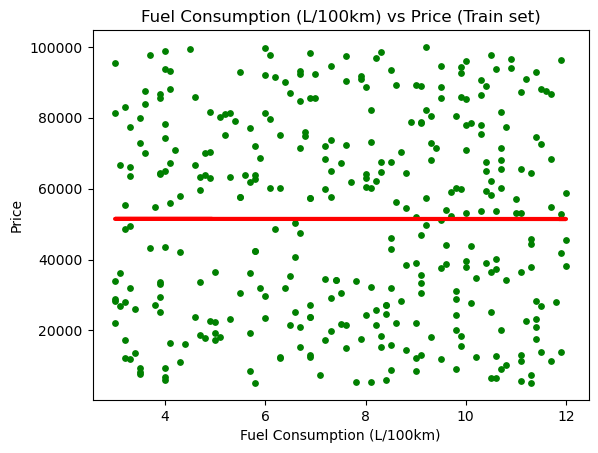

In [492]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Fuel Consumption (L/100km) vs Price (Train set)')
plot_test.xlabel('Fuel Consumption (L/100km)')
plot_test.ylabel('Price')
plot_test.show()

### There are no correlations found in terms of Price and Fuel Consumption in regression analysis

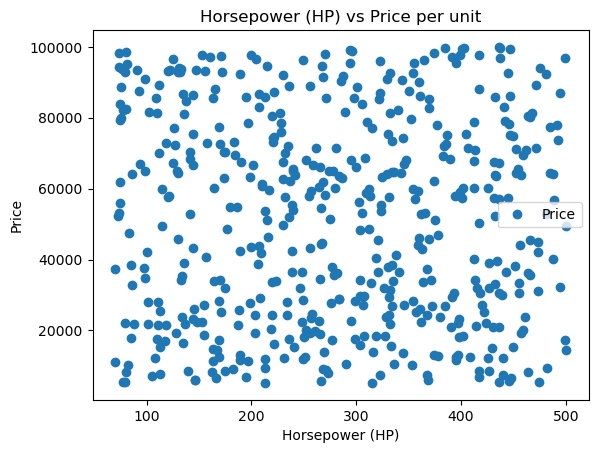

In [493]:
import matplotlib.pyplot as plt

# Create a scatterplot using matplotlib
df.plot(x='Horsepower (HP)', y='Price', style='o', label=None)  # Remove the default label

# Add title and labels
plt.title('Horsepower (HP) vs Price per unit')  
plt.xlabel('Horsepower (HP)')  
plt.ylabel('Price')  


# Show the plot
plt.show()


In [494]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Horsepower (HP)'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [495]:
X

array([[213],
       [335],
       [445],
       [165],
       [145],
       [449],
       [456],
       [368],
       [101],
       [270],
       [437],
       [137],
       [231],
       [333],
       [ 74],
       [ 78],
       [454],
       [111],
       [451],
       [215],
       [125],
       [331],
       [ 76],
       [171],
       [327],
       [157],
       [251],
       [466],
       [110],
       [120],
       [417],
       [164],
       [227],
       [130],
       [110],
       [144],
       [298],
       [489],
       [296],
       [188],
       [344],
       [395],
       [153],
       [266],
       [412],
       [ 99],
       [265],
       [112],
       [112],
       [354],
       [399],
       [304],
       [234],
       [239],
       [365],
       [430],
       [332],
       [500],
       [408],
       [334],
       [167],
       [164],
       [340],
       [488],
       [153],
       [163],
       [343],
       [481],
       [452],
       [442],
       [134],
      

In [496]:
y

array([[12063.27],
       [33890.58],
       [92639.12],
       [88003.5 ],
       [26028.97],
       [15308.15],
       [44140.68],
       [ 5986.91],
       [21694.91],
       [58172.74],
       [96926.17],
       [21897.61],
       [12182.03],
       [15725.01],
       [53162.29],
       [ 5581.21],
       [65411.9 ],
       [21605.04],
       [38185.54],
       [94527.1 ],
       [96681.76],
       [29456.24],
       [79954.02],
       [97407.64],
       [18350.07],
       [40829.05],
       [12431.02],
       [80090.82],
       [17642.96],
       [57566.52],
       [50440.5 ],
       [33959.39],
       [81233.65],
       [64447.73],
       [81259.02],
       [23362.07],
       [85681.2 ],
       [56667.92],
       [98885.42],
       [25669.89],
       [90673.66],
       [12412.04],
       [97808.57],
       [44431.78],
       [78689.39],
       [64913.78],
       [19073.1 ],
       [69961.24],
       [89225.65],
       [92643.5 ],
       [58991.32],
       [15951.  ],
       [2441

In [497]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [498]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [499]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [500]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

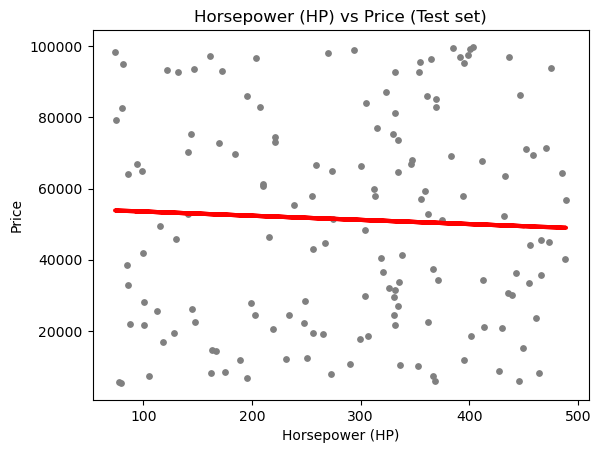

In [501]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)  # Scatter plot of test data
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)  # Plot regression line

# Add title and labels
plot_test.title('Horsepower (HP) vs Price (Test set)')
plot_test.xlabel('Horsepower (HP)')
plot_test.ylabel('Price')

# Show the plot
plot_test.show()


In [502]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [503]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-11.72597339]]
Mean squared error:  882277669.6057866
R2 score:  -0.008759381595033977


In [504]:
y_predicted

array([[53614.94270912],
       [49147.34684587],
       [50472.38183943],
       [50132.328611  ],
       [51551.17139172],
       [53802.55828343],
       [50824.16104127],
       [49417.04423394],
       [53790.83231004],
       [53849.46217701],
       [53837.73620362],
       [51727.06099263],
       [49381.86631376],
       [50507.55975962],
       [50577.91559998],
       [53767.38036325],
       [50003.34290366],
       [50659.99741374],
       [50554.46365319],
       [48983.18321835],
       [49651.56370183],
       [51152.48829631],
       [53169.35572014],
       [51152.48829631],
       [53556.31284215],
       [49170.79879266],
       [50835.88701466],
       [53063.82195959],
       [53544.58686876],
       [51046.95453576],
       [53333.51934766],
       [52829.3024917 ],
       [49569.48188807],
       [50226.13639815],
       [50894.51688163],
       [49475.67410091],
       [53392.14921463],
       [50366.84807888],
       [50390.30002567],
       [52700.31678436],


In [505]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,66954.21,53614.942709
1,93920.16,49147.346846
2,22508.30,50472.381839
3,97089.04,50132.328611
4,98094.28,51551.171392
5,5581.21,53802.558283
6,92642.39,50824.161041
7,71168.65,49417.044234
8,5395.30,53790.832310
9,98338.06,53849.462177


In [506]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [507]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [508]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-11.72597339]]
Mean squared error:  793100215.021819
R2 score:  0.002538516983510264


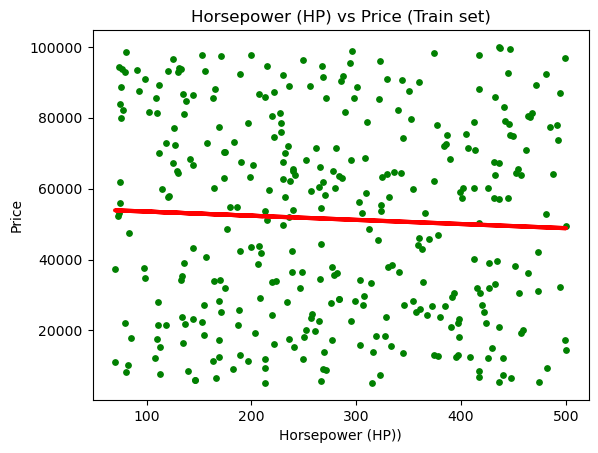

In [509]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Horsepower (HP) vs Price (Train set)')
plot_test.xlabel('Horsepower (HP))')
plot_test.ylabel('Price')
plot_test.show()

### There are no correlations found in terms of Price and Horsepower in regression analysis

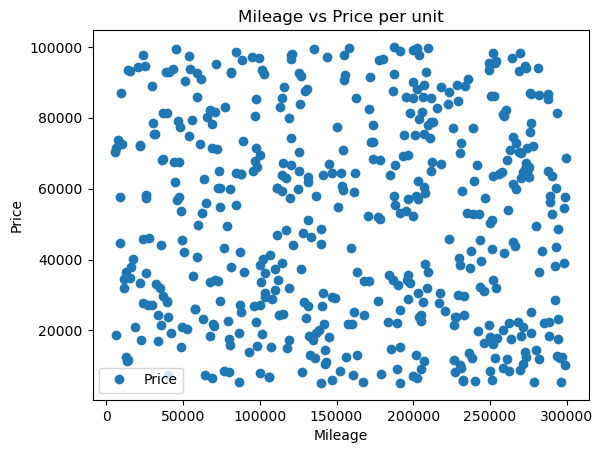

In [510]:
import matplotlib.pyplot as plt

# Create a scatterplot using matplotlib
df.plot(x='Mileage', y='Price', style='o', label=None)  # Remove the default label

# Add title and labels
plt.title('Mileage vs Price per unit')  
plt.xlabel('Mileage')  
plt.ylabel('Price')  


# Show the plot
plt.show()


In [511]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [512]:
X

array([[260886],
       [ 72505],
       [125356],
       [130867],
       [ 57482],
       [107269],
       [121481],
       [251434],
       [157502],
       [ 25732],
       [264196],
       [ 69449],
       [295610],
       [ 97941],
       [235306],
       [ 86129],
       [274728],
       [ 35558],
       [292415],
       [ 25451],
       [180520],
       [103349],
       [119078],
       [ 53607],
       [288215],
       [ 59165],
       [155962],
       [ 65845],
       [294184],
       [  9076],
       [250318],
       [168165],
       [ 36757],
       [162366],
       [ 39390],
       [294449],
       [211415],
       [ 45706],
       [191494],
       [191185],
       [155007],
       [ 12719],
       [154609],
       [139858],
       [213014],
       [287541],
       [101366],
       [230730],
       [206806],
       [ 81041],
       [161443],
       [ 80577],
       [233266],
       [237395],
       [177807],
       [ 18861],
       [160313],
       [ 78321],
       [297121

In [513]:
y

array([[12063.27],
       [33890.58],
       [92639.12],
       [88003.5 ],
       [26028.97],
       [15308.15],
       [44140.68],
       [ 5986.91],
       [21694.91],
       [58172.74],
       [96926.17],
       [21897.61],
       [12182.03],
       [15725.01],
       [53162.29],
       [ 5581.21],
       [65411.9 ],
       [21605.04],
       [38185.54],
       [94527.1 ],
       [96681.76],
       [29456.24],
       [79954.02],
       [97407.64],
       [18350.07],
       [40829.05],
       [12431.02],
       [80090.82],
       [17642.96],
       [57566.52],
       [50440.5 ],
       [33959.39],
       [81233.65],
       [64447.73],
       [81259.02],
       [23362.07],
       [85681.2 ],
       [56667.92],
       [98885.42],
       [25669.89],
       [90673.66],
       [12412.04],
       [97808.57],
       [44431.78],
       [78689.39],
       [64913.78],
       [19073.1 ],
       [69961.24],
       [89225.65],
       [92643.5 ],
       [58991.32],
       [15951.  ],
       [2441

In [514]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [515]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [516]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [517]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

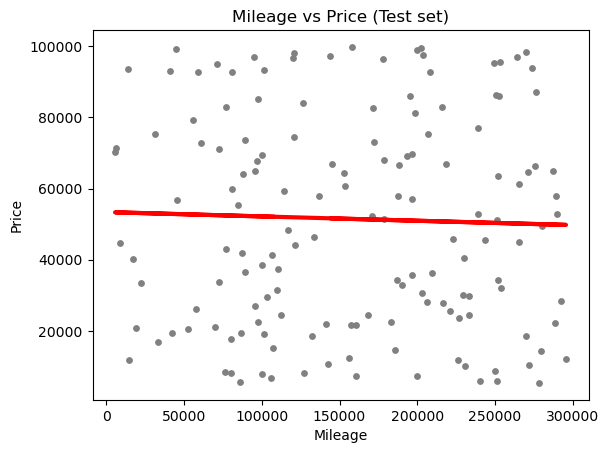

In [518]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)  # Scatter plot of test data
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)  # Plot regression line

# Add title and labels
plot_test.title('Mileage vs Price (Test set)')
plot_test.xlabel('Mileage')
plot_test.ylabel('Price')

# Show the plot
plot_test.show()


In [519]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [520]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01216723]]
Mean squared error:  876572445.4316736
R2 score:  -0.0022362669248976452


In [521]:
y_predicted

array([[51630.2865388 ],
       [50064.41302127],
       [51163.47868639],
       [52237.66237116],
       [51922.31216737],
       [52346.29137878],
       [52673.34645548],
       [52513.62725935],
       [50005.18295753],
       [50111.0986734 ],
       [52717.16064191],
       [51728.95058705],
       [53125.17645076],
       [52003.21206338],
       [50586.93460866],
       [52524.00590446],
       [51784.25063629],
       [50737.43104629],
       [50312.50279113],
       [52838.12721827],
       [51316.5667435 ],
       [50554.26560267],
       [50860.83106817],
       [51971.79628184],
       [49895.6657423 ],
       [50165.83903018],
       [52136.77172026],
       [53325.29084238],
       [52331.87321412],
       [51113.77556182],
       [52988.7088265 ],
       [51646.45678422],
       [50603.79838605],
       [51043.6923311 ],
       [50305.0686151 ],
       [50343.3953819 ],
       [50706.19777316],
       [50328.61220042],
       [52204.17816092],
       [52897.49112151],


In [522]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,66954.21,51630.286539
1,93920.16,50064.413021
2,22508.30,51163.478686
3,97089.04,52237.662371
4,98094.28,51922.312167
5,5581.21,52346.291379
6,92642.39,52673.346455
7,71168.65,52513.627259
8,5395.30,50005.182958
9,98338.06,50111.098673


In [523]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [524]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [525]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01216723]]
Mean squared error:  793978928.6333995
R2 score:  0.0014333817615639344


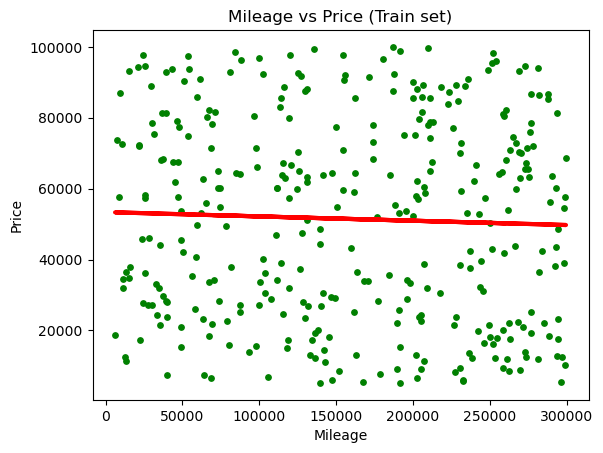

In [526]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Mileage vs Price (Train set)')
plot_test.xlabel('Mileage')
plot_test.ylabel('Price')
plot_test.show()

### There are no correlations found in terms of Price and Mileage in regression analysis

### In conclusion, the linear regression analysis conducted on the dataset, including the relationships between fuel consumption vs. price, horsepower vs. price, and mileage vs. price, did not yield significant insights. This may be attributed to the limitations posed by the relatively small sample size of 500 data points. Additionally, the observed price increase may not be solely influenced by a single parameter, but rather may involve the interaction of multiple variables.